In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [ ]:
!wget --no-check-certificate https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089 -O Yulu.csv

--2025-07-15 06:40:30--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.176, 108.157.172.173, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘Yulu.csv’

Yulu.csv            100%[===================>] 633.16K  --.-KB/s    in 0.06s   

2025-07-15 06:40:30 (9.55 MB/s) - ‘Yulu.csv’ saved [648353/648353]



In [ ]:
df = pd.read_csv('Yulu.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
print('rows: ',df.shape[0] ,"Cols: ", df.shape[1])

rows:  10886 Cols:  12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
cate_col = ['season', 'holiday', 'workingday', 'weather']
df[cate_col] = df[cate_col].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
df.describe(include = 'all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,NaN,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-27 05:56:22.399411968,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
#min date in the above data : 2011-01-0  & max date: 2012-12-19

#finding null values.
df.isna().sum()
#No null Value is present

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
#unique values in categorical cols
df[cate_col].melt().groupby(['variable' , 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

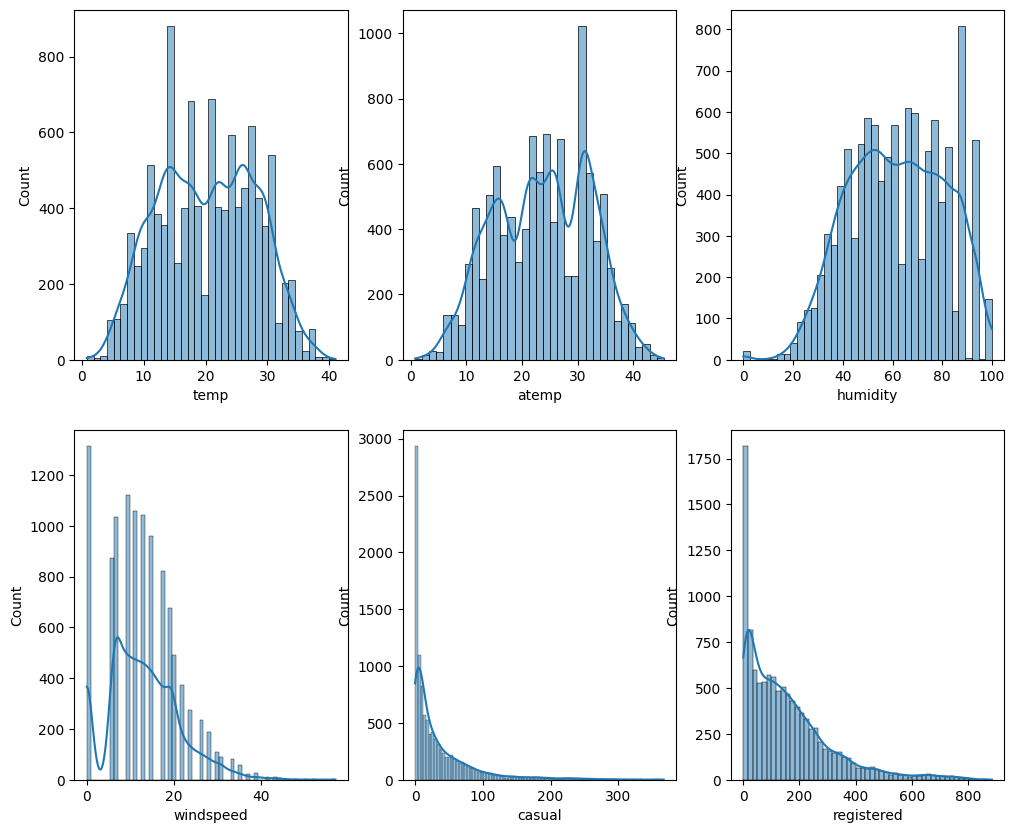

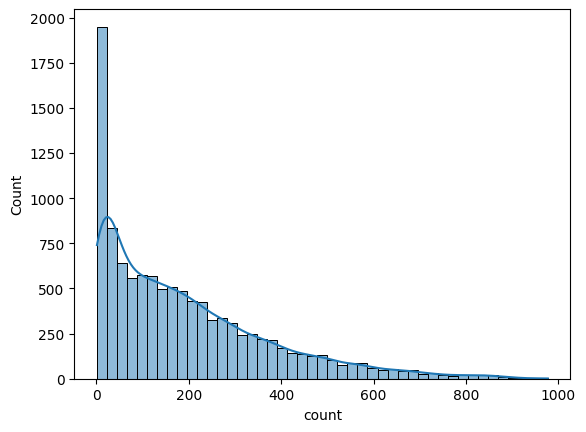

In [ ]:
#checking numerical data distributions

num_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

fig , axis = plt.subplots(nrows = 2, ncols = 3, figsize = (12,10))
i=0
for row in range(2):
  for col in range(3):
    sns.histplot(df[num_col[i]], ax = axis[row][col], kde=True)
    i+=1
plt.show()
sns.histplot(df[num_col[-1]] ,kde = True )
plt.show()


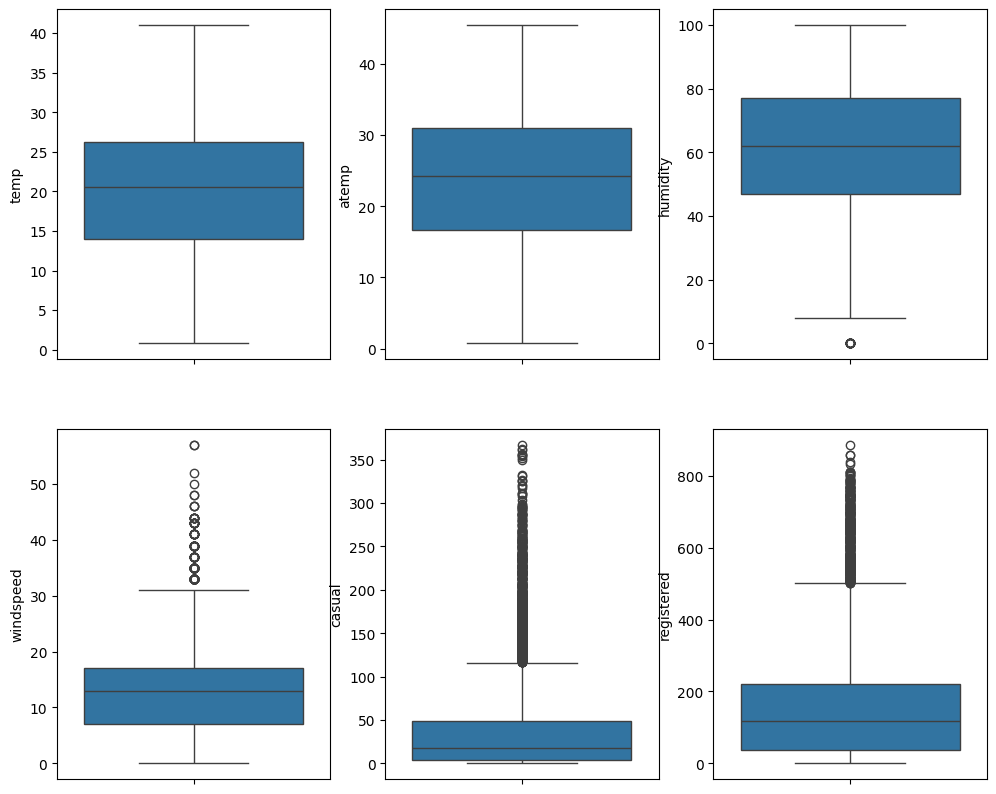

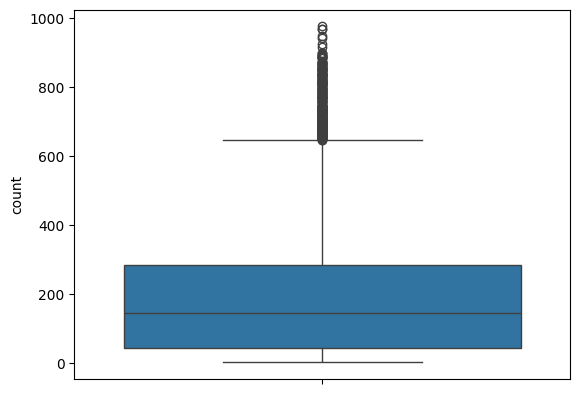

In [ ]:
#detecting outliers

fig , axis = plt.subplots(nrows=2, ncols=3, figsize = (12,10))

i=0
for row in range(2):
  for col in range(3):
    sns.boxplot(df[num_col[i]], ax = axis[row , col])
    i+=1
plt.show()
sns.boxplot(df[num_col[-1]])
plt.show()


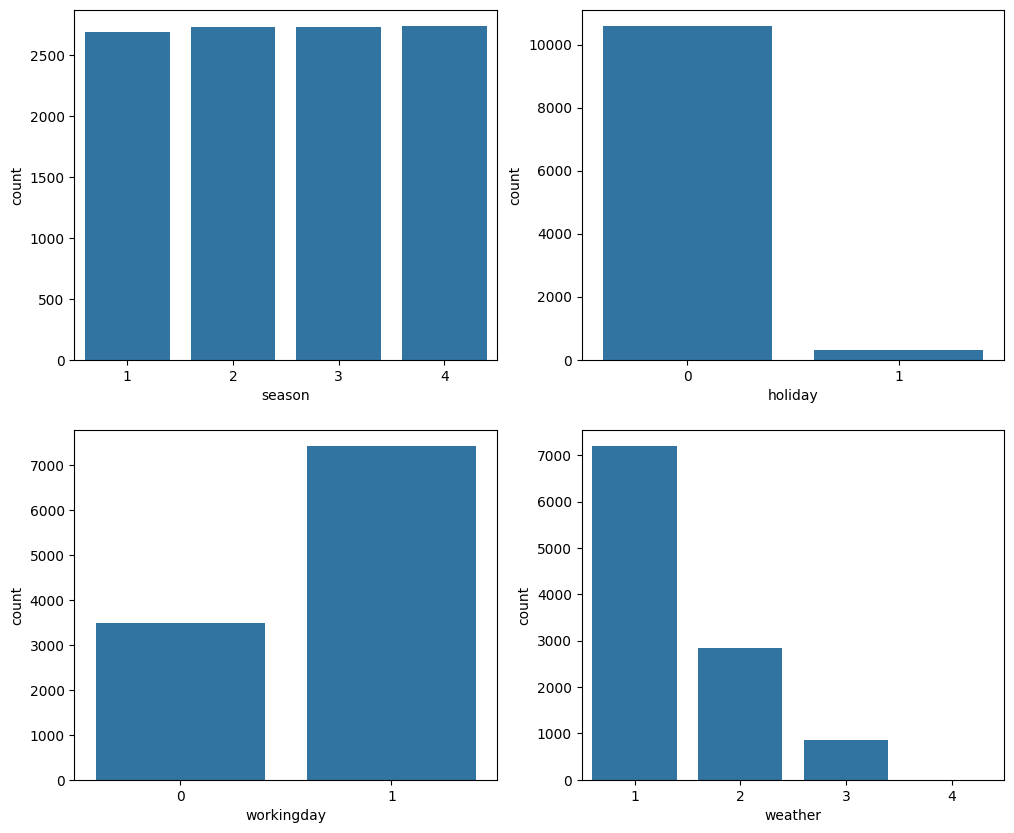

In [ ]:
#We can see there are outliers in count , Windspeed , Casual , Registered and one in humidity
# Count plot for categorical data

fig,axis = plt.subplots(nrows=2 , ncols=2 , figsize=(12,10))

i=0
for row in range(2):
  for col in range(2):
    sns.countplot(data = df, x=cate_col[i], ax = axis[row][col])
    i+=1
plt.show()

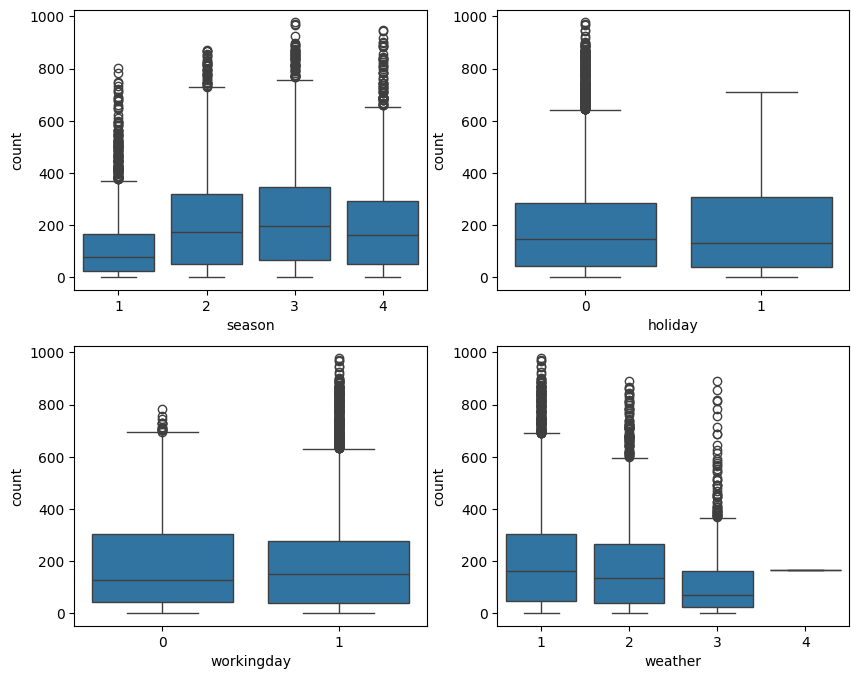

In [ ]:
# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

i = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cate_col[i], y='count', ax=axis[row, col])
        i += 1

plt.show()

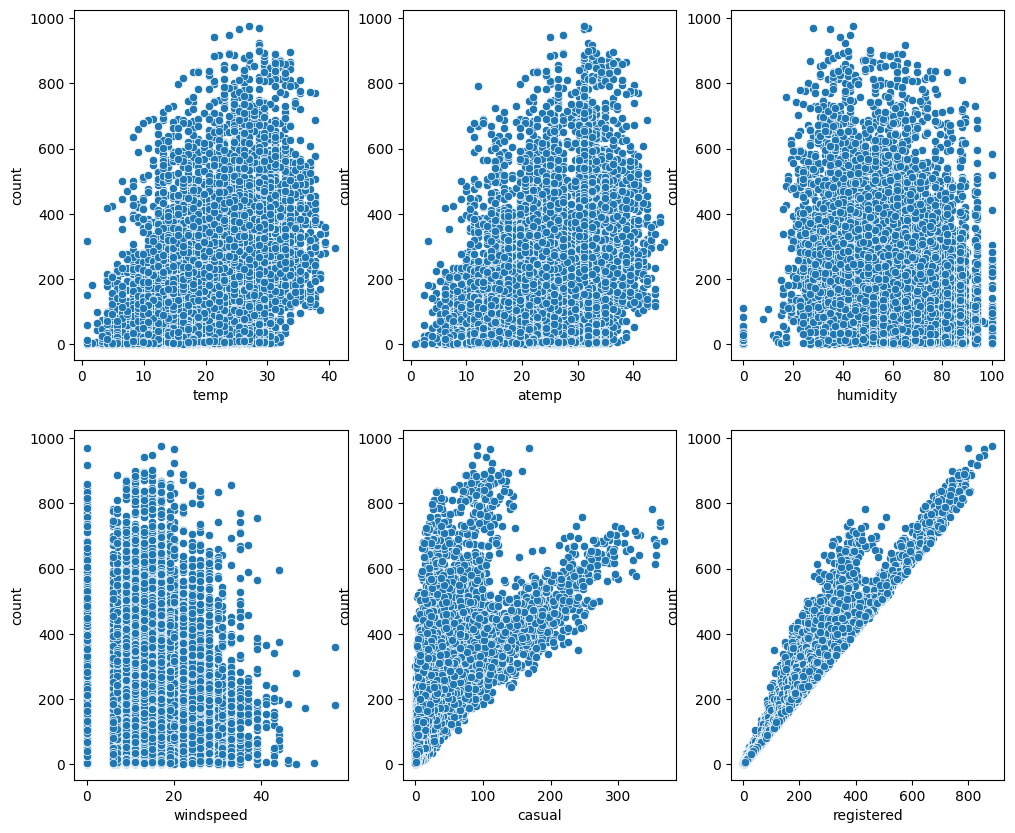

In [ ]:
#Plotting numerical values against count using scatterplot

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
i=0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_col[i], y='count', ax=axis[row, col])
        i += 1
plt.show()


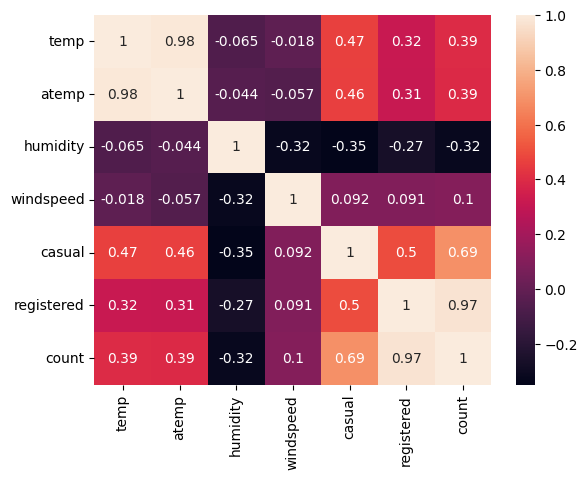

In [ ]:
#looking for correlation between count and numerical value

df.corr()['count']
sns.heatmap(df[num_col].corr(), annot=True)
plt.show()


In [ ]:
df_table = pd.crosstab(df['season'] , df['weather'])
df_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
pval = stats.chi2_contingency(df_table)[1]
pval
alpha = 0.05

if pval < alpha:
  print('Reject Null Hypothesis: Seasons and Weathers are dependent' )
else:
  print('Accept Null Hypothesis: Seasons and Weathers are independent')

Reject Null Hypothesis: Seasons and Weathers are dependent


In [ ]:
a=df[df['workingday'] == 1]['count'].values
b=df[df['workingday'] == 0]['count'].values
pval = stats.ttest_ind(a,b , alternative = 'two-sided')[1]
alpha = 0.05

if pval < alpha:
  print('Reject Null Hypothesis: Workday does impact the number of electric cycle rented' )
else:
  print('Accept Null Hypothesis : Workday has no efect on the number of cycle rented')



Accept Null Hypothesis : Workday has no efect on the number of cycle rented


In [ ]:
# Annova test for season and weather impact on electric cycle rented

s1=df[df['season']==1]['count'].values
s2=df[df['season']==2]['count'].values
s3=df[df['season']==3]['count'].values
s4=df[df['season']==4]['count'].values

w1=df[df['weather']==1]['count'].values
w2=df[df['weather']==2]['count'].values
w3=df[df['weather']==3]['count'].values
w4=df[df['weather']==4]['count'].values

groups = [s1,s2,s3,s4,w1,w2,w3,w4]

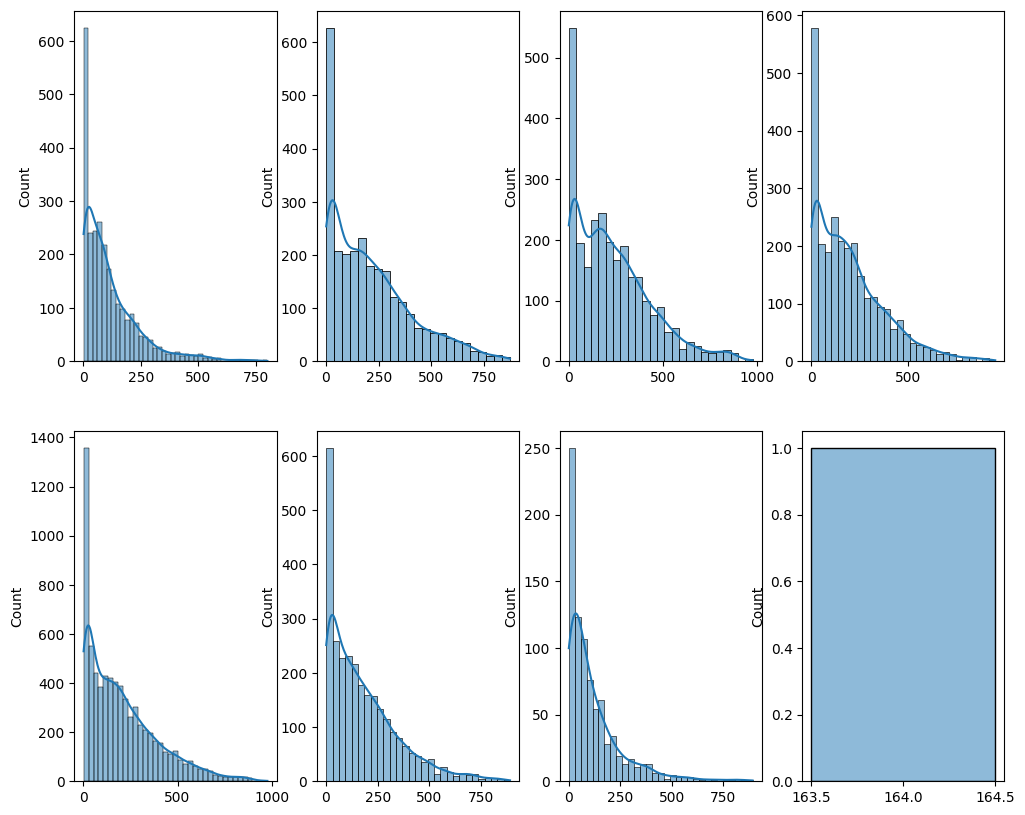

In [ ]:
#checking distribution

fig,axis = plt.subplots(nrows=2, ncols=4, figsize=(12,10))
i=0
for rows in range(2):
  for col in range(4):
    sns.histplot(groups[i], ax = axis[rows][col], kde=True)
    i+=1
plt.show()

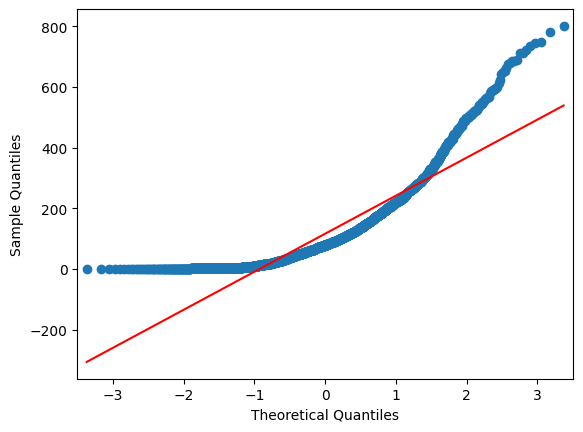

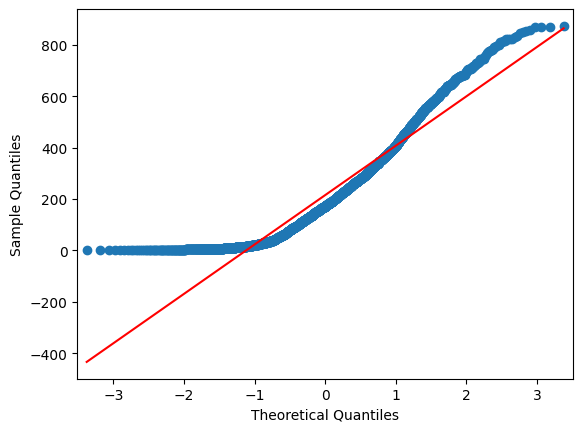

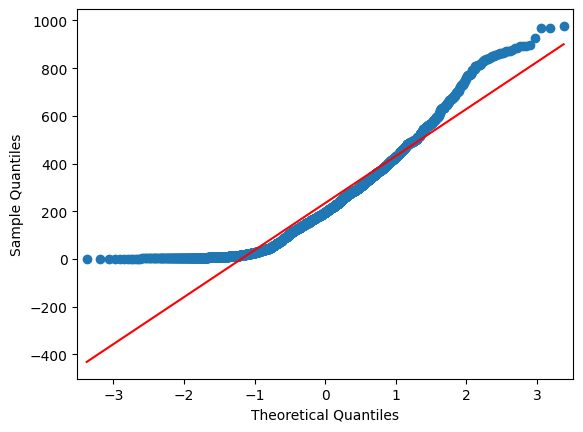

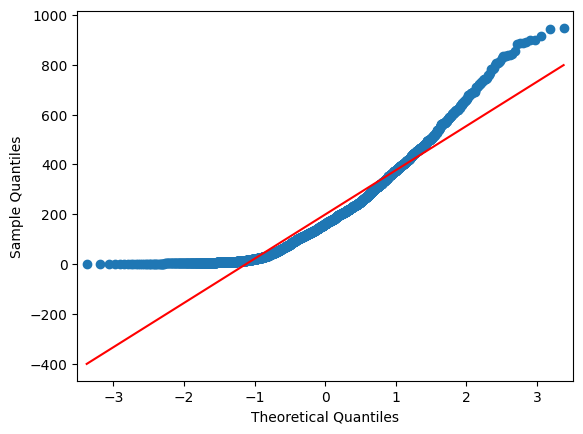

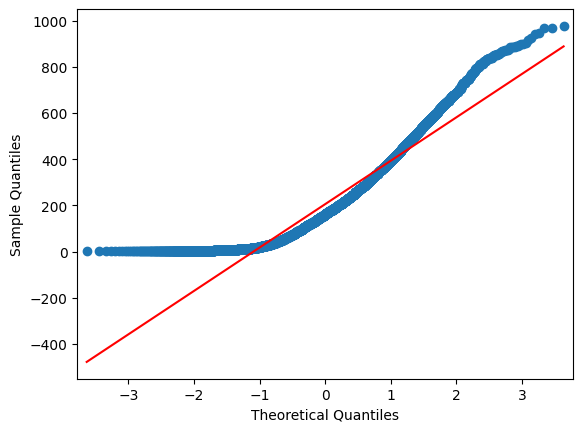

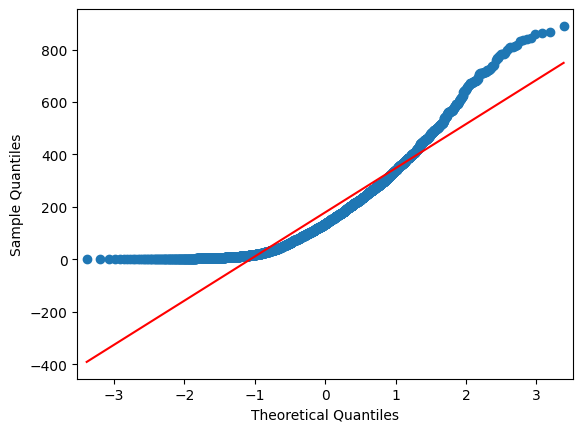

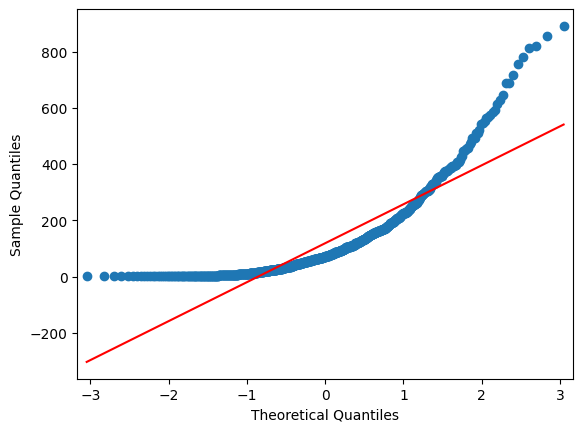

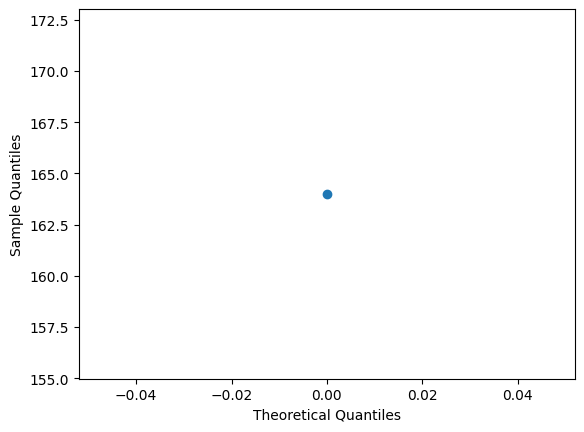

In [ ]:
#Mostly data is right skewed but weather with value 4 is uniformly distributed
from statsmodels.graphics.gofplots import qqplot

#
i=0
for row in range(2):
  for col in range(4):
    qqplot(groups[i], line = 's')
    i+=1
plt.show()

In [ ]:
#Null Hypothesis: Variance is similar in different season and weather
#Alternate Hypothesis Variance is different in different season and weather
#Significance Level = 0.05
pval = stats.levene(s1,s2,s3,s4,w1,w2,w3,w4)[1]

if pval < 0.05:
  print("Variance is different in different season and weather")
else:
  print("Variance is similar in different season and weather")

Variance is different in different season and weather


In [ ]:
#Since conditions for annova is not met we will go with Kruskal wallis test

stats.kruskal(s1,s2,s3,s4,w1,w2,w3,w4)

KruskalResult(statistic=np.float64(904.7105757287106), pvalue=np.float64(4.614440933900297e-191))

In [ ]:
#Since pval is less than 0.05 we reject null hypothesis. There fore season and weather greatly impact the electric cycle demand

In [ ]:
print("hi")

hi


In [ ]:
"I hope"

'I hope'